# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading

After completing each part of the assignment, be sure to submit your solutions to the grader.

For this programming exercise, you are only required to complete the first part of the exercise to implement linear regression with one variable. The second part of the exercise, which is optional, covers linear regression with multiple variables. The following is a breakdown of how each part of this exercise is scored.

**Required Exercises**

| Section | Part                                           |Submitted Function                     | Points 
|---------|:-                                             |:-                                     | :-:    
| 1       | [Warm up exercise](#section1)                  | [`warmUpExercise`](#warmUpExercise)    |  10    
| 2       | [Compute cost for one variable](#section2)     | [`computeCost`](#computeCost)         |  40    
| 3       | [Gradient descent for one variable](#section3) | [`gradientDescent`](#gradientDescent) |  50    
|         | Total Points                                   |                                       | 100    

**Optional Exercises**

| Section | Part                                                 | Submitted Function | Points |
|:-------:|:-                                                    |:-:                  | :-:    |
| 4       | [Feature normalization](#section4)                   | [`featureNormalize`](#featureNormalize) | 0      |
| 5       | [Compute cost for multiple variables](#section5)     | [`computeCostMulti`](#computeCostMulti) | 0      |
| 6       | [Gradient descent for multiple variables](#section5) | [`gradientDescentMulti`](#gradientDescentMulti) |0      |
| 7       | [Normal Equations](#section7)                        | [`normalEqn`](#normalEqn)        | 0      |

You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>


## Debugging

Here are some things to keep in mind throughout this exercise:

- Python array indices start from zero, not one (contrary to OCTAVE/MATLAB). 

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

The first part of this assignment gives you practice with python and `numpy` syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [3]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    
    A = np.eye(5)   # modify this line
    
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [ ]:
warmUpExercise()

### 1.1 Submitting solutions

After completing a part of the exercise, you can submit your solutions for grading by first adding the function you modified to the grader object, and then sending your function to Coursera for grading. 

The grader will prompt you for your login e-mail and submission token. You can obtain a submission token from the web page for the assignment. You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

Execute the next cell to grade your solution to the first part of this exercise.

*You should now submit your solutions.*

In [ ]:
# appends the implemented function in part 1 to the grader object
grader[1] = warmUpExercise

# send the added functions to coursera grader for getting a grade on this part
grader.grade()

## 2 Linear regression with one variable

Bây giờ bạn sẽ thực hiện hồi quy tuyến tính với một biến để dự đoán lợi nhuận cho một xe tải thực phẩm. Giả sử bạn là giám đốc điều hành của một cửa hàng nhượng quyền nhà hàng và đang xem xét các thành phố khác nhau để mở một cửa hàng mới. Chuỗi đã có xe tải ở các thành phố khác nhau và bạn có dữ liệu về lợi nhuận và dân số từ các thành phố. Bạn muốn sử dụng dữ liệu này để giúp bạn chọn thành phố sẽ mở rộng tiếp theo.
Tệp `Data / ex1data1.txt` chứa tập dữ liệu cho bài toán hồi quy tuyến tính của chúng tôi. Cột đầu tiên là dân số của một thành phố (tính bằng 10.000 giây) và cột thứ hai là lợi nhuận của một xe bán đồ ăn ở thành phố đó (tính bằng 10.000 USD). Giá trị âm của lợi nhuận cho thấy bị lỗ.
Chúng tôi cung cấp cho bạn mã cần thiết để tải dữ liệu này. Tập dữ liệu được tải từ tệp dữ liệu vào các biến `x` và` y`:


In [5]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

### 2.1 Plotting the Data

Trước khi bắt đầu thực hiện bất kỳ nhiệm vụ nào, việc hiểu dữ liệu bằng cách trực quan hóa nó thường rất hữu ích. Đối với tập dữ liệu này, bạn có thể sử dụng biểu đồ phân tán để trực quan hóa dữ liệu, vì nó chỉ có hai thuộc tính để vẽ biểu đồ (lợi nhuận và dân số). Nhiều vấn đề khác mà bạn sẽ gặp phải trong cuộc sống thực là đa chiều và không thể được thể hiện trên một cốt truyện 2 chiều. Có rất nhiều thư viện vẽ sơ đồ trong python (xem [bài đăng trên blog] này (https://blog.modeanalytics.com/python-data-visualization-libraries/) để biết tóm tắt hay về những thư viện phổ biến nhất).

Trong khóa học này, chúng tôi sẽ độc quyền sử dụng `matplotlib` để thực hiện tất cả các âm mưu của chúng tôi. `matplotlib` là một trong những thư viện vẽ đồ thị khoa học phổ biến nhất trong python và có các công cụ và chức năng phong phú để tạo ra các mảnh đất đẹp. `pyplot` là một mô-đun trong` matplotlib` cung cấp giao diện đơn giản hóa cho các tác vụ vẽ âm mưu phổ biến nhất của `matplotlib`, bắt chước giao diện vẽ đồ thị của MATLAB.

<div class="alert alert-block alert-warning">
Bạn có thể nhận thấy rằng chúng tôi đã nhập mô-đun `pyplot` vào đầu bài tập này bằng cách sử dụng lệnh` từ matplotlib import pyplot`. Điều này khá phổ biến và nếu bạn xem mã python ở nơi khác hoặc trong các hướng dẫn về `matplotlib`, bạn sẽ thấy rằng mô-đun được đặt tên là` plt`. Điều này được sử dụng bằng cách đổi tên mô-đun bằng cách sử dụng lệnh nhập `nhập matplotlib.pyplot as plt`. Chúng tôi sẽ không sử dụng tên viết tắt của mô-đun `pyplot` trong các bài tập trên lớp này, nhưng bạn nên biết về độ lệch này so với chuẩn.
</div>


Ở phần sau, công việc đầu tiên của bạn là hoàn thành hàm `plotData` bên dưới. Sửa đổi chức năng và điền vào mã sau:

```python
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [7]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.xlabel('Population of City in 10,000s')
    pyplot.ylabel('Profit in $10,000s')
    pyplot.title("Figure 1: Scatter plot of training data\n", fontsize = 14)    

    # =============================================================


Bây giờ hãy chạy hàm đã xác định với dữ liệu đã tải để trực quan hóa dữ liệu. Kết quả cuối cùng sẽ giống như hình sau:

![](Figures/dataset1.png)

Execute the next cell to visualize the data.

In [ ]:
plotData(X, y)

Để nhanh chóng tìm hiểu thêm về hàm plot của `matplotlib` và những đối số nào bạn có thể cung cấp cho nó, bạn có thể nhập`? Pyplot.plot` vào một ô trong sổ ghi chép jupyter. Thao tác này sẽ mở ra một trang riêng hiển thị tài liệu cho chức năng được yêu cầu. Bạn cũng có thể tìm kiếm trực tuyến tài liệu về âm mưu.

Để đặt các điểm đánh dấu thành các vòng tròn màu đỏ, chúng tôi đã sử dụng tùy chọn `` hoặc '' trong hàm `plot`.

?pyplot.plot

<a id="section2"></a>
### 2.2 Gradient Descent

Trong phần này, bạn sẽ điều chỉnh các tham số hồi quy tuyến tính $\theta$ với tập dữ liệu của chúng tôi bằng cách sử dụng gradient descent.

#### 2.2.1 Update Equations

Mục tiêu của hồi quy tuyến tính là giảm thiểu cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Nhớ lại rằng các tham số của mô hình của bạn là các giá trị $\theta_j$. Đây là những giá trị bạn sẽ điều chỉnh để giảm thiểu chi phí $J(\theta)$. Một cách để làm điều này là sử dụng thuật toán giảm độ dốc hàng loạt. Trong giảm độ dốc hàng loạt, mỗi lần lặp lại thực hiện cập nhật

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

Với mỗi bước giảm dần độ dốc, các tham số $\theta_j$ của bạn tiến gần đến giá trị tối ưu sẽ đạt được chi phí thấp nhất J ($\theta$).

<div class="alert alert-block alert-warning">
** Lưu ý triển khai: ** Chúng tôi lưu trữ mỗi ví dụ dưới dạng một hàng trong ma trận $X$ trong Python `numpy`. Để tính đến cụm từ chặn $\theta_0$ , chúng tôi thêm một cột đầu tiên bổ sung vào $X$ và đặt nó thành tất cả các cột. Điều này cho phép chúng tôi coi $\theta_0$ đơn giản là một 'tính năng' khác.
</div>


#### 2.2.2 Implementation

Chúng tôi đã thiết lập dữ liệu cho hồi quy tuyến tính. Trong ô sau, chúng tôi thêm một thứ nguyên khác vào dữ liệu của mình để phù hợp với thuật ngữ chặn $\theta_0$ . KHÔNG thực thi ô này nhiều hơn một lần.

In [9]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

Khi bạn thực hiện phép giảm độ dốc để tìm hiểu hàm chi phí giảm thiểu $J(\theta)$, sẽ hữu ích nếu bạn theo dõi sự hội tụ bằng cách tính toán chi phí. Trong phần này, bạn sẽ triển khai một hàm để tính $J(\theta)$ để bạn có thể kiểm tra sự hội tụ của việc triển khai gradient descent của mình.

Nhiệm vụ tiếp theo của bạn là hoàn thành mã cho hàm `computeCost` tính $J(\theta)$. Khi bạn đang làm điều này, hãy nhớ rằng các biến $X$ và $y$ không phải là giá trị vô hướng. $X$ là một ma trận có các hàng đại diện cho các ví dụ từ tập huấn luyện và $y$ là một vectơ mà mỗi phần tử của nó đại diện cho giá trị tại một hàng nhất định là $X$.
<a id="computeCost"></a>

In [12]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================

    J = np.sum(np.power(np.dot(X, theta) - y, 2)) / (2*m)
    
    # ===========================================================
    return J

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [13]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


*You should now submit your solutions by executing the following cell.*

In [ ]:
grader[2] = computeCost
grader.grade()

<a id="section3"></a>
#### 2.2.4 Gradient descent

Tiếp theo, bạn sẽ hoàn thành một hàm thực hiện chuyển đổi gradient xuống.
Cấu trúc vòng lặp đã được viết cho bạn và bạn chỉ cần cung cấp các bản cập nhật cho $\theta$ trong mỗi lần lặp lại.

Khi bạn lập trình, hãy đảm bảo rằng bạn hiểu những gì bạn đang cố gắng tối ưu hóa và những gì đang được cập nhật. Hãy ghi nhớ rằng the cost $J(\theta)$ được tham số hóa bởi vectơ $\theta$, not $X$ and $y$. Đó là, chúng tôi giảm thiểu giá trị của $J(\theta)$ bằng cách thay đổi các giá trị của vectơ $\theta$, không phải bằng cách thay đổi $X$ or $y$. [Tham khảo các phương trình trong sổ tay này](#section2) và các bài giảng video nếu bạn không chắc chắn. Một cách tốt để xác minh rằng dốc xuống có hoạt động chính xác hay không là xem giá trị của $J(\theta)$ và kiểm tra xem nó có đang giảm dần theo từng bước hay không.

Mã khởi động cho hàm `gradientDescent` gọi` computeCost` trên mỗi lần lặp và tiết kiệm chi phí vào danh sách `python`. Giả sử bạn đã triển khai gradient descent và `computeCost` một cách chính xác, giá trị của bạn làf $J(\theta)$ không bao giờ được tăng và phải hội tụ về một giá trị ổn định vào cuối thuật toán.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Các lưu ý triển khai quan trọng

Vectơ trong `numpy` là mảng một chiều, ví dụ` np.array ([1, 2, 3]) `là một vectơ. Ma trận trong `numpy` là một mảng hai chiều, ví dụ` np.array ([[1, 2, 3], [4, 5, 6]]) `. Tuy nhiên, phần sau vẫn được coi là ma trận `np.array ([[1, 2, 3]])` vì nó có hai chiều, ngay cả khi nó có hình dạng 1x3 (trông giống như một vectơ).

Với những điều trên, hàm `np.dot` mà chúng ta sẽ sử dụng cho tất cả phép nhân ma trận / vectơ có các thuộc tính sau:
- Nó luôn biểu diễn các tích trong trên vectơ. Nếu `x = np.array ([1, 2, 3])`, thì `np.dot (x, x)` là a scalar.
- Đối với phép nhân ma trận-vectơ, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- Một vectơ có thể được thăng hạng thành ma trận bằng cách sử dụng `y [None]` hoặc `[y [np.newaxis]`. Nghĩa là, nếu `y = np.array ([1, 2, 3])` là một vectơ có kích thước 3, thì `y [None,:]` là một ma trận shape $1 \times 3$. We can use `y[:, None]` để có được hình dạng của $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [16]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        
        theta = theta - (alpha/m)*(np.dot(X.T, np.dot(X, theta) - y))

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [17]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


We will use your final parameters to plot the linear fit. The results should look like the following figure.

![](Figures/regression_result.png)

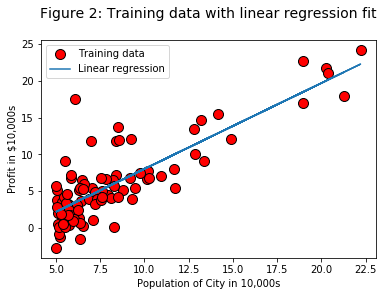

In [14]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.title("Figure 2: Training data with linear regression fit\n", fontsize = 14)
pyplot.legend(['Training data', 'Linear regression'])
pyplot.show()

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

<div class="alert alert-block alert-success">
Lưu ý cách mà các dòng sau sử dụng phép nhân ma trận, thay vì phép tính tổng hoặc lặp rõ ràng, để tính toán các dự đoán. Đây là một ví dụ về vectơ hóa mã trong `numpy`.
</div>

<div class="alert alert-block alert-success">
Lưu ý rằng đối số đầu tiên của hàm `numpy`` dot` là một danh sách python. `numpy` có thể chuyển đổi nội bộ **valid** python liệt kê các mảng numpy khi được cung cấp rõ ràng làm đối số cho các hàm `numpy`.
</div>


In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



*You should now submit your solutions by executing the next cell.*

In [16]:
grader[3] = gradientDescent
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |  50 /  50 | Nice work!
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            | 100 / 100 |  



### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, bây giờ bạn sẽ vẽ biểu đồ chi phí trên một lưới 2 chiều của $\theta_0$ and $\theta_1$ values. Bạn sẽ không cần phải viết bất cứ điều gì mới cho phần này, nhưng bạn nên hiểu cách mã bạn đã viết đang tạo ra những hình ảnh này.

Trong ô tiếp theo, mã được thiết lập để tính toán $J(\theta)$ trên một lưới các giá trị bằng cách sử dụng `computeCost` chức năng mà bạn đã viết. Sau khi thực thi ô sau, bạn sẽ có một mảng 2-D gồm $J(\theta)$ values. Sau đó, những giá trị đó được sử dụng để tạo ra các đồ thị bề mặt và đường viền của $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. Các âm mưu sẽ trông giống như sau:
![](Figures/cost_function.png)

Mục đích của các biểu đồ này là cho bạn biết cách $J(\theta)$ thay đổi với những thay đổi trong $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ có hình cái bát và có mức tối thiểu toàn cầu. (Điều này dễ thấy trong biểu đồ đường viền hơn trong biểu đồ bề mặt 3D). Mức tối thiểu này là điểm tối ưu cho $\theta_0$ and $\theta_1$, và mỗi bước của gradient giảm dần di chuyển gần đến điểm này.

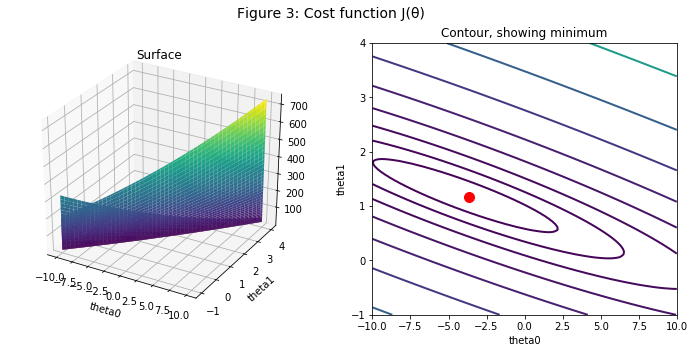

In [17]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
fig.suptitle("Figure 3: Cost function J(θ)\n", fontsize=14)
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pyplot.show()

## Optional Exercises

Nếu bạn đã hoàn thành thành công tài liệu trên, xin chúc mừng! Bây giờ bạn đã hiểu hồi quy tuyến tính và có thể bắt đầu sử dụng nó trên bộ dữ liệu của riêng bạn.

Đối với phần còn lại của bài tập lập trình này, chúng tôi đã bao gồm các bài tập tùy chọn sau đây. Những bài tập này sẽ giúp bạn hiểu sâu hơn về tài liệu và nếu bạn có thể làm như vậy, chúng tôi khuyến khích bạn hoàn thành chúng. Bạn vẫn có thể gửi lời giải cho những bài tập này để kiểm tra xem câu trả lời của bạn có đúng hay không.

## 3 Linear regression with multiple variables

Trong phần này, bạn sẽ thực hiện hồi quy tuyến tính với nhiều biến để dự đoán giá nhà. Giả sử bạn đang bán căn nhà của mình và bạn muốn biết giá thị trường tốt sẽ là bao nhiêu. Một cách để làm điều này trước tiên là thu thập thông tin về những ngôi nhà đã bán gần đây và lập mô hình giá nhà ở.

The file `Data/ex1data2.txt` chứa một tập huấn luyện về giá nhà ở Portland, Oregon. Cột đầu tiên là kích thước của ngôi nhà (tính bằng mét vuông), cột thứ hai là số phòng ngủ, và cột thứ ba là giá của ngôi nhà.

<a id="section4"></a>
### 3.1 Feature Normalization

Chúng tôi bắt đầu bằng cách tải và hiển thị một số giá trị từ tập dữ liệu này. Bằng cách xem xét các giá trị, hãy lưu ý rằng kích thước ngôi nhà gấp khoảng 1000 lần số phòng ngủ. Khi các đối tượng địa lý khác nhau theo thứ tự độ lớn, việc thực hiện chia tỷ lệ đối tượng đầu tiên có thể làm cho độ dốc đi xuống hội tụ nhanh hơn nhiều.

In [18]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Nhiệm vụ của bạn ở đây là hoàn thành mã trong hàm `featureNormalize`:
- Trừ giá trị trung bình của từng đối tượng khỏi tập dữ liệu.
- Sau khi trừ giá trị trung bình, hãy chia tỷ lệ bổ sung (chia) các giá trị của đối tượng địa lý theo “độ lệch chuẩn” tương ứng của chúng.

Độ lệch chuẩn là một cách đo lường mức độ biến thiên trong phạm vi giá trị của một đối tượng cụ thể (hầu hết các điểm dữ liệu sẽ nằm trong khoảng ± 2 độ lệch chuẩn của giá trị trung bình); đây là một giải pháp thay thế cho việc lấy phạm vi giá trị (tối đa-tối thiểu). Trong `numpy`, bạn có thể sử dụng hàm` std` để tính độ lệch chuẩn.

Ví dụ: số lượng `X [:, 0]` chứa tất cả các giá trị của $ x_1 $ (kích thước ngôi nhà) trong tập huấn luyện, vì vậy `np.std (X [:, 0])` tính độ lệch chuẩn của kích thước nhà.
Tại thời điểm mà hàm `featureNormalize` được gọi, cột phụ của 1 tương ứng với $ x_0 = 1 $ vẫn chưa được thêm vào $ X $.

Bạn sẽ làm điều này cho tất cả các tính năng và mã của bạn phải hoạt động với các tập dữ liệu ở mọi kích thước (bất kỳ số lượng tính năng / ví dụ nào). Lưu ý rằng mỗi cột của ma trận $ X $ tương ứng với một đặc điểm.

<div class="alert alert-block alert-warning">
** Lưu ý triển khai: ** Khi chuẩn hóa các tính năng, điều quan trọng
để lưu trữ các giá trị được sử dụng để chuẩn hóa - giá trị trung bình và độ lệch chuẩn được sử dụng cho các phép tính. Sau khi tìm hiểu các thông số từ mô hình, chúng ta thường muốn dự đoán giá của những ngôi nhà mà chúng ta chưa xem trước đó. Đưa ra một giá trị x mới (diện tích phòng khách và số phòng ngủ), trước tiên chúng ta phải chuẩn hóa x bằng cách sử dụng giá trị trung bình và độ lệch chuẩn mà chúng ta đã tính toán trước đó từ tập huấn luyện.
</div>
<a id="featureNormalize"></a>

In [1]:
def  featureNormalize(X):
    """
    Chuẩn hóa các tính năng trong X. 
    trả về phiên bản chuẩn hóa của X trong đó giá trị trung bình của mỗi tính năng là 0 và độ lệch chuẩn là 1. 
    Đây thường là bước tiền xử lý tốt cần thực hiện khi làm việc với các thuật toán học.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    Trước tiên, đối với mỗi thứ nguyên đối tượng, hãy tính giá trị trung bình của đối tượng và trừ nó khỏi tập dữ liệu, 
    lưu trữ giá trị trung bình trong mu.
    Tiếp theo, tính toán độ lệch chuẩn của từng đối tượng và chia từng đối tượng cho độ lệch chuẩn của nó, 
    lưu trữ độ lệch chuẩn trong sigma.
    Lưu ý rằng X là một ma trận trong đó mỗi cột là một đặc điểm và mỗi hàng là một ví dụ.
    Bạn cần thực hiện quá trình chuẩn hóa riêng biệt cho từng tính năng.
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    n = X.shape[1]
    for i in range(n):
        mu[i] = np.mean(X[:,i])
    for i in range(n):
        sigma[i] = np.std(X[:,i])
    for i in range(n):
        X_norm[:,i] = (X[:,i]-mu[i])/sigma[i]   
    
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [ ]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

*You should now submit your solutions.*

In [ ]:
grader[4] = featureNormalize
grader.grade()

Sau khi chức năng `featureNormalize` được kiểm tra, bây giờ chúng tôi thêm thuật ngữ chặn vào` X_norm`:

In [22]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section5"></a>
### 3.2 Gradient Descent

Trước đây, bạn đã triển khai gradient descent trên một bài toán hồi quy đơn biến. Sự khác biệt duy nhất bây giờ là có thêm một tính năng trong ma trận $ X $. Hàm giả thuyết và cập nhật giảm độ dốc hàng loạt
quy tắc vẫn không thay đổi.

Bạn nên hoàn thành mã cho các hàm `computeCostMulti` và` gradientDescentMulti` để triển khai hàm chi phí và giảm độ dốc cho hồi quy tuyến tính với nhiều biến. Nếu mã của bạn trong phần trước (biến đơn) đã hỗ trợ nhiều biến, bạn cũng có thể sử dụng nó ở đây.
Đảm bảo mã của bạn hỗ trợ bất kỳ số lượng tính năng nào và được vectơ hóa tốt.
Bạn có thể sử dụng thuộc tính `shape` của mảng` numpy` để tìm xem có bao nhiêu tính năng hiện diện trong tập dữ liệu.

<div class = "alert alert-block alert-warning">
** Lưu ý triển khai: ** Trong trường hợp đa biến, hàm chi phí có thể
cũng được viết dưới dạng vectơ hóa sau:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

phiên bản vector hóa hiệu quả khi bạn đang làm việc với các công cụ tính toán số như `numpy`. Nếu bạn là một chuyên gia với các phép toán ma trận, bạn có thể tự mình chứng minh rằng hai dạng này là tương đương.
</div>

<a id="computeCostMulti"></a>

In [23]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================

    J = np.sum(np.power(np.dot(X, theta) -y, 2)) / (2*m)
    
    # ==================================================================
    return J


*You should now submit your solutions.*

In [24]:
grader[5] = computeCostMulti
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |  50 /  50 | Nice work!
                      Feature Normalization |   0 /   0 | Nice work!
    Computing Cost (for multiple variables) |   0 /   0 | Nice work!
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            | 100 / 100 |  



<a id="gradientDescentMulti"></a>

In [25]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        theta = theta - (alpha/m)*(np.dot(X.T, np.dot(X, theta) - y))
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

*You should now submit your solutions.*

In [26]:
grader[6] = gradientDescentMulti
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |  50 /  50 | Nice work!
                      Feature Normalization |   0 /   0 | Nice work!
    Computing Cost (for multiple variables) |   0 /   0 | Nice work!
  Gradient Descent (for multiple variables) |   0 /   0 | Nice work!
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            | 100 / 100 |  



#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

Trong phần này của bài tập, bạn sẽ thử các tốc độ học tập khác nhau cho tập dữ liệu và tìm ra tốc độ học tập hội tụ một cách nhanh chóng. Bạn có thể thay đổi tốc độ học bằng cách sửa đổi mã sau và thay đổi một phần của mã đặt tốc độ học.

Sử dụng việc triển khai hàm `gradientDescentMulti` của bạn và chạy gradient descent trong khoảng 50 lần lặp với tốc độ học đã chọn. Hàm cũng sẽ trả về lịch sử của các giá trị $ J (\theta) $ trong một vectơ $ J $.

Sau lần lặp cuối cùng, hãy vẽ biểu đồ các giá trị J dựa trên số lần lặp.

Nếu bạn chọn một tỷ lệ học tập trong một phạm vi tốt, biểu đồ của bạn trông giống như Hình sau. 

![](Figures/learning_rate.png)

Nếu biểu đồ của bạn trông rất khác, đặc biệt nếu giá trị $ J (\theta) $ của bạn tăng lên hoặc thậm chí tăng lên, hãy điều chỉnh tốc độ học tập của bạn và thử lại. Chúng tôi khuyên bạn nên thử các giá trị của tỷ lệ học tập $ \alpha $ trên thang đo nhật ký, ở các bước nhân khoảng 3 lần giá trị trước đó (tức là 0,3, 0,1, 0,03, 0,01, v.v.). Bạn cũng có thể muốn điều chỉnh số lần lặp lại bạn đang chạy nếu điều đó sẽ giúp bạn thấy được xu hướng tổng thể trong đường cong.

<div class="alert alert-block alert-warning">
** Lưu ý triển khai: ** Nếu tốc độ học tập của bạn quá lớn, $ J (\theta) $ có thể bị lệch và 'tăng', dẫn đến các giá trị quá lớn đối với tính toán của máy tính. Trong những tình huống này, `numpy` sẽ có xu hướng quay trở lại NaNs. NaN là viết tắt của 'not a number' và thường được gây ra bởi các phép toán không xác định liên quan đến −∞ và + ∞.
</div>

<div class="alert alert-block alert-warning">

** Mẹo MATPLOTLIB: ** Để so sánh tỷ lệ học tập khác nhau ảnh hưởng đến sự hội tụ như thế nào, sẽ hữu ích khi vẽ biểu đồ $ J $ cho một số tỷ lệ học tập trên cùng một con số. Điều này có thể được thực hiện bằng cách tạo `alpha` thành một danh sách python và lặp qua các giá trị trong danh sách này và gọi hàm âm mưu trong mỗi lần lặp lại của vòng lặp. Nó cũng hữu ích để có một chú giải để phân biệt các dòng khác nhau trong cốt truyện. Tìm kiếm trực tuyến cho `pyplot.legend` để được trợ giúp về cách hiển thị các huyền thoại trong` matplotlib`.
</div>

Lưu ý những thay đổi trong các đường cong hội tụ khi tốc độ học tập thay đổi. Với một tỷ lệ học tập nhỏ, bạn sẽ thấy rằng gradient descent cần một thời gian rất dài để hội tụ đến giá trị tối ưu. Ngược lại, với tốc độ học tập lớn, độ dốc gradient có thể không hội tụ hoặc thậm chí có thể phân kỳ!
Sử dụng tỷ lệ học tập tốt nhất mà bạn tìm thấy, chạy tập lệnh để chạy gradient descent cho đến khi hội tụ để tìm các giá trị cuối cùng của $ \theta $. Kế tiếp, sử dụng giá trị $ \theta $ này để dự đoán giá của một ngôi nhà có diện tích 1650 bộ vuông và 3 phòng ngủ. Bạn sẽ sử dụng giá trị sau đó để kiểm tra việc thực hiện các phương trình bình thường. Đừng quên chuẩn hóa các tính năng của bạn khi bạn đưa ra dự đoán này!

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


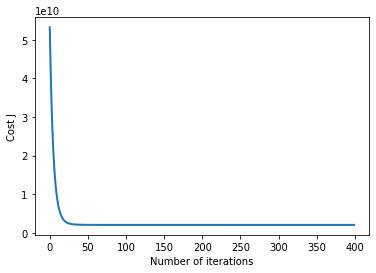

In [27]:
"""
Instructions
------------
Chúng tôi đã cung cấp cho bạn mã khởi động sau đây chạy gradient descent với tốc độ học cụ thể (alpha).

Nhiệm vụ của bạn trước tiên là đảm bảo rằng các hàm của bạn - `computeCost` và` gradientDescent` 
đã hoạt động với mã khởi động này và hỗ trợ nhiều biến.

Sau đó, hãy thử chạy gradient descent với các giá trị alpha khác nhau và xem cái nào mang lại cho bạn kết quả tốt nhất.

Cuối cùng, bạn nên hoàn thành mã ở cuối để dự đoán giá của một ngôi nhà 3 br, rộng 1650 mét vuông.

Hint
----
Khi dự đoán, hãy đảm bảo bạn thực hiện chuẩn hóa tính năng tương tự.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = 0   # You should change this

X_inputs = [1, 1650, 3]
X_inputs[1:3]= (X_inputs[1:3] - mu[0:2]) / sigma[0:2] # Normalize the input variables

price = np.dot(X_inputs, theta)

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

*You do not need to submit any solutions for this optional (ungraded) part.*

<a id="section7"></a>
### 3.3 Normal Equations

Trong các video bài giảng, bạn đã biết rằng giải pháp dạng đóng cho hồi quy tuyến tính là

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Sử dụng công thức này không yêu cầu bất kỳ tỷ lệ tính năng nào và bạn sẽ nhận được giải pháp chính xác trong một phép tính: không có “vòng lặp cho đến khi hội tụ” như trong gradient descent.

Đầu tiên, chúng tôi sẽ tải lại dữ liệu để đảm bảo rằng các biến không bị sửa đổi. Hãy nhớ rằng mặc dù bạn không cần chia tỷ lệ các tính năng của mình, chúng tôi vẫn cần thêm cột 1 vào ma trận $ X $ để có một số hạng chặn ($ \theta_0 $). Mã trong ô tiếp theo sẽ thêm cột từ 1 đến X cho bạn.

In [28]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Hoàn thành mã cho hàm `normalEqn` dưới đây để sử dụng công thức trên để tính $ \theta $.

<a id="normalEqn"></a>

In [29]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Tra cứu hàm `np.linalg.pinv` để tính toán nghịch đảo ma trận.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================

    theta = np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))
    
    # =================================================================
    return theta

*You should now submit your solutions.*

In [30]:
grader[7] = normalEqn
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |  50 /  50 | Nice work!
                      Feature Normalization |   0 /   0 | Nice work!
    Computing Cost (for multiple variables) |   0 /   0 | Nice work!
  Gradient Descent (for multiple variables) |   0 /   0 | Nice work!
                           Normal Equations |   0 /   0 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



Optional (ungraded) exercise: Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [31]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = 0 # You should change this
price = np.dot([1, 1650, 3], theta)

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
